In [1]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
import dtreeviz
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct, Matern, RationalQuadratic, WhiteKernel
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.gaussian_process.kernels import RBF

from bayes_opt import BayesianOptimization
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

## 1. HR Analytics

### 1.1 Load and Sample the data

In [5]:
hr_df = pd.read_csv('C:\\Users\\marke\\MACHINE LEARNING\\Assignment 1\\hr_train_test.csv')

hr_df.head()

,Unnamed: 0,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,46134,0.235237,1.0,0.0,1.000000,0.0,0.842285,1.00,0.0,0.0,0.225116,0
1,39664,0.714404,1.0,0.0,1.000000,0.0,0.627915,0.75,1.0,0.0,0.225116,1
2,16779,0.714404,0.5,1.0,0.750433,1.0,0.468174,0.75,1.0,0.0,0.291215,1
3,43651,0.142480,0.5,1.0,1.000000,0.0,0.396930,0.50,0.0,0.0,0.450687,0
4,15117,0.714404,0.5,1.0,1.000000,0.0,0.433146,0.75,0.0,0.0,0.247580,0


In [6]:
print(hr_df.columns)

Index(['Unnamed: 0', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')


In [7]:
# split at index 6535

hr_df = hr_df.drop(columns=['Unnamed: 0'])
hr_df.head()

,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.235237,1.0,0.0,1.000000,0.0,0.842285,1.00,0.0,0.0,0.225116,0
1,0.714404,1.0,0.0,1.000000,0.0,0.627915,0.75,1.0,0.0,0.225116,1
2,0.714404,0.5,1.0,0.750433,1.0,0.468174,0.75,1.0,0.0,0.291215,1
3,0.142480,0.5,1.0,1.000000,0.0,0.396930,0.50,0.0,0.0,0.450687,0
4,0.714404,0.5,1.0,1.000000,0.0,0.433146,0.75,0.0,0.0,0.247580,0


In [8]:
#X_data = hr_df[:6535]
#Y_data = hr_df[6535:]

X_data = hr_df[hr_df.columns[:-1]]
Y_data = hr_df[hr_df.columns[-1]]

X_data.shape, Y_data.shape

((9336, 10), (9336,))

In [9]:
#X_train = X_data[X_data.columns[:-1]]
#y_train = X_data[X_data.columns[-1]]

X_train = X_data[:6535]
X_test = X_data[6535:]

In [10]:
X_train

,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,0.235237,1.0,0.0,1.000000,0.0,0.842285,1.00,0.0,0.0,0.225116
1,0.714404,1.0,0.0,1.000000,0.0,0.627915,0.75,1.0,0.0,0.225116
2,0.714404,0.5,1.0,0.750433,1.0,0.468174,0.75,1.0,0.0,0.291215
3,0.142480,0.5,1.0,1.000000,0.0,0.396930,0.50,0.0,0.0,0.450687
4,0.714404,0.5,1.0,1.000000,0.0,0.433146,0.75,0.0,0.0,0.247580
...,...,...,...,...,...,...,...,...,...,...
6530,0.142480,0.5,1.0,0.750433,0.0,0.566854,0.75,0.0,0.0,0.373751
6531,0.235237,0.5,0.0,0.750433,0.0,0.433146,0.00,1.0,0.0,0.758274
6532,0.142480,0.5,1.0,1.000000,0.0,0.320593,1.00,1.0,0.0,0.786284
6533,0.142480,0.5,0.0,1.000000,1.0,0.566854,0.00,1.0,0.0,0.953215


In [11]:
#X_test = Y_data[Y_data.columns[:-1]]
#y_test = Y_data[Y_data.columns[-1]]

y_train = Y_data[:6535]
y_test = Y_data[6535:]

In [12]:
y_train

0       0
1       1
2       1
3       0
4       0
       ..
6530    0
6531    0
6532    0
6533    1
6534    1
Name: is_promoted, Length: 6535, dtype: int64

In [13]:
X_columns = X_train.columns
y_columns = [y_train.name]

print(X_columns)

Index(['region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score'],
      dtype='object')


### 1.2 Build the Model(s)

#### Decision Trees

In [11]:
dt = tree.DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

#### Random Forest Classifier

In [164]:
rf = RandomForestClassifier(n_estimators = 20)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

#### Gradient Boosting Classifier

In [74]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

#### Gaussian Process

In [57]:
gaussian_process = GaussianProcessClassifier(kernel=1*RBF(1.0))
gaussian_process.fit(X_train, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

### 1.3 Evaluate and Improve the Model(s)

#### Decision Trees

can try post pruning as well, cost-complexity pruning and the weakest link pruning

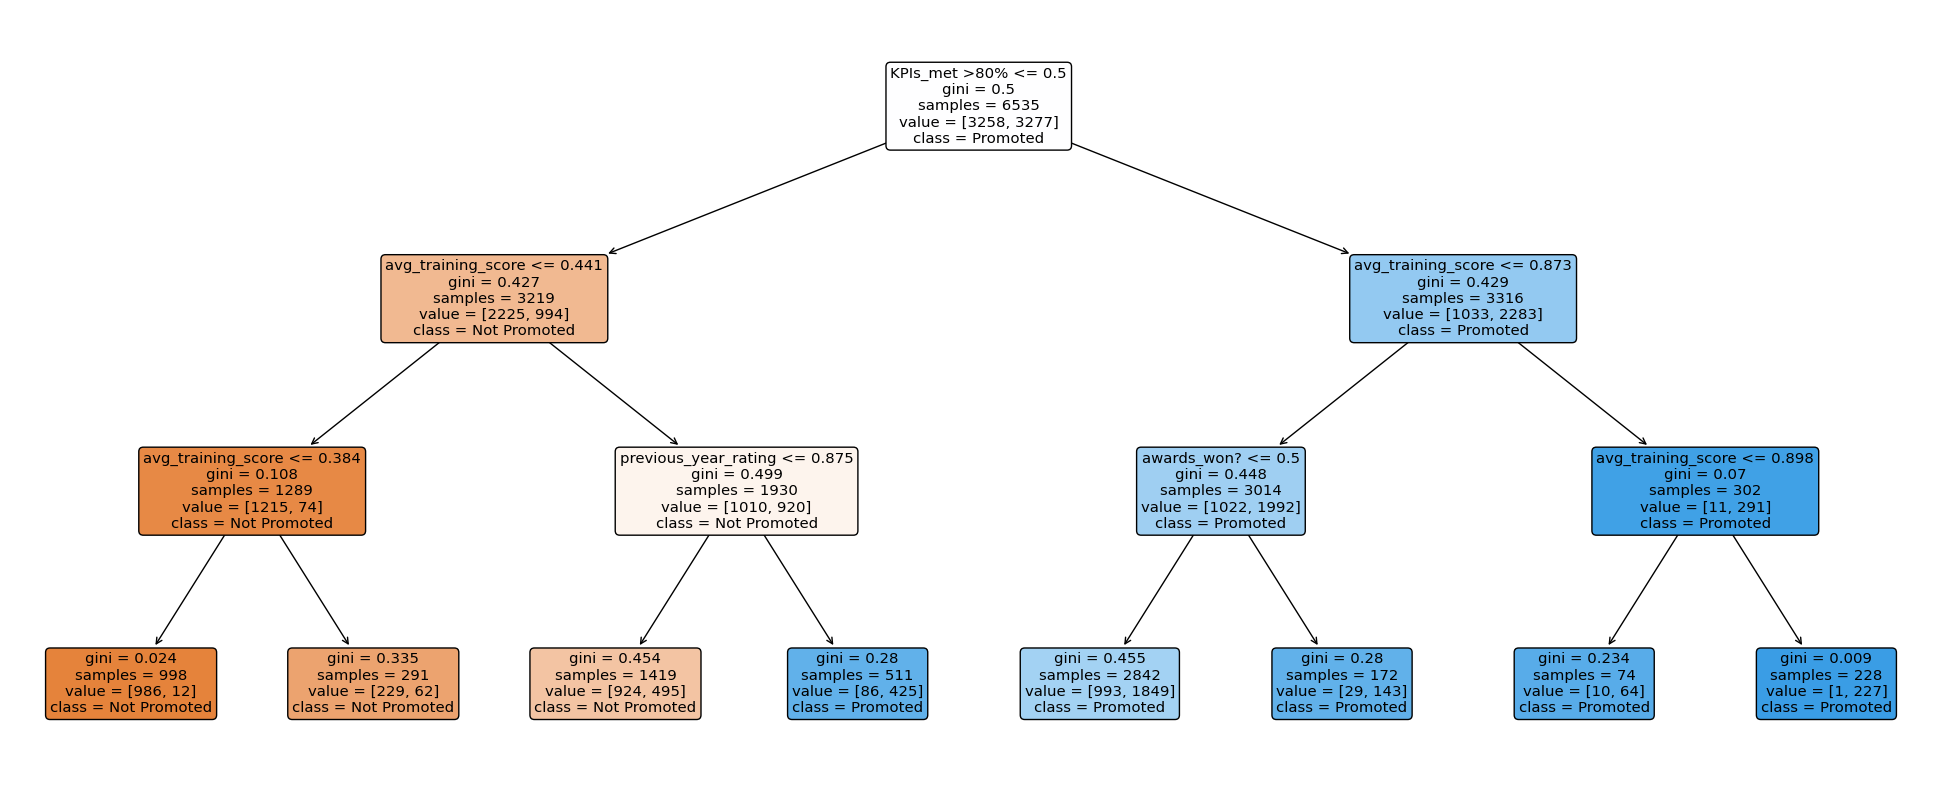

In [14]:
plt.figure(figsize=(25,10))
plot_tree(dt, feature_names=list(X_train.columns), class_names=['Not Promoted', 'Promoted'], rounded=True, filled=True)
plt.show()

# https://insidelearningmachines.com/interpret_decision_trees/
# for understanding dtrees and gini impurity

We can see from the diagram that we can continue splitting, some boxes have very high number of samples for both classes (eg: [993, 1849]) 

Gini impurity values for some of the splits are still very high (0.454), maximum for binary classification is 0.5

In [15]:
print('training accuracy is: ', dt.score(X_train,y_train))
print('testing accuracy is: ', dt.score(X_test,y_test))

training accuracy is:  0.741698546289212
testing accuracy is:  0.7372367011781507


##### Tuning max_depth

In [18]:
depth_range = range(2,10)

train_acc = []
test_acc = []

for d in depth_range:
    # Create Random Forest Model
    dt = DecisionTreeClassifier(max_depth=d,random_state=1)
    dt.fit(X_train, y_train) 
    train_acc.append(dt.score (X_train, y_train))
    test_acc.append(dt.score(X_test, y_test))

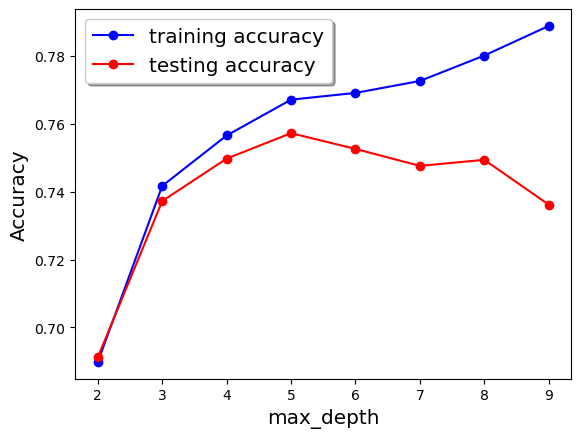

In [19]:
plt.plot(depth_range, train_acc, 'bo-', label ='training accuracy')
plt.plot(depth_range, test_acc, 'ro-', label = 'testing accuracy')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

Model shows underfitting initially. At around max_depth = 5, testing accuracy starts to decrease while training accuracy continues increasing. This shows that overfitting starts after max depth 5. We can use max_depth 5 as it provides us with the highest test accuracy 

In [20]:
dt = tree.DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
print('training accuracy is: ', dt.score(X_train,y_train))
print('testing accuracy is: ', dt.score(X_test,y_test))

training accuracy is:  0.7671002295332823
testing accuracy is:  0.7572295608711175


##### GridSearch

In [13]:
dt = tree.DecisionTreeClassifier(max_depth = 5)

# max_leaf_nodes and max_feature is a pre-pruning process
# gridsearch helps us find optimal hyperparameters
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 15, 20], "min_samples_split" : [2,4,6,8,10,12]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) # 

print(gs.best_score_)
print(gs.best_params_)

#https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c
# gini vs entropy and greedy approach 

0.7622038486215117
{'criterion': 'gini', 'min_samples_leaf': 20, 'min_samples_split': 2}


In [23]:
dt = tree.DecisionTreeClassifier(max_depth = 5, max_features = 10, max_leaf_nodes = 10, min_samples_leaf = 1, min_samples_split = 2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features=10, max_leaf_nodes=10)

##### Feature Importance 

In [25]:
dfFeatures = pd.DataFrame({'Features':X_train.columns.tolist(),'Importances':dt.feature_importances_})
dfFeatures.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
7,KPIs_met >80%,0.418790
9,avg_training_score,0.343737
6,previous_year_rating,0.155793
8,awards_won?,0.081679
0,region,0.000000
1,education,0.000000
2,gender,0.000000
3,recruitment_channel,0.000000
4,no_of_trainings,0.000000
5,age,0.000000


In [40]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

poly.fit(X_train[['KPIs_met >80%', 'avg_training_score', 'previous_year_rating']])

X_train_poly = poly.transform(X_train[['KPIs_met >80%', 'avg_training_score', 'previous_year_rating']])
X_test_poly = poly.transform(X_test[['KPIs_met >80%', 'avg_training_score', 'previous_year_rating']])

In [42]:
X_train_poly = pd.DataFrame(X_train_poly)
X_test_poly = pd.DataFrame(X_test_poly)

# add column names of created features
X_train_poly.columns = poly.get_feature_names_out(['KPIs_met >80%', 'avg_training_score', 'previous_year_rating'])
X_test_poly.columns = poly.get_feature_names_out(['KPIs_met >80%', 'avg_training_score', 'previous_year_rating'])

In [46]:
dt = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 1, min_samples_split = 2)
dt.fit(X_train_poly,y_train)

DecisionTreeClassifier(max_depth=5)

In [47]:
print('training accuracy is: ', dt.score(X_train_poly,y_train))
print('testing accuracy is: ', dt.score(X_test_poly,y_test))

training accuracy is:  0.75592960979342
testing accuracy is:  0.7443770082113531


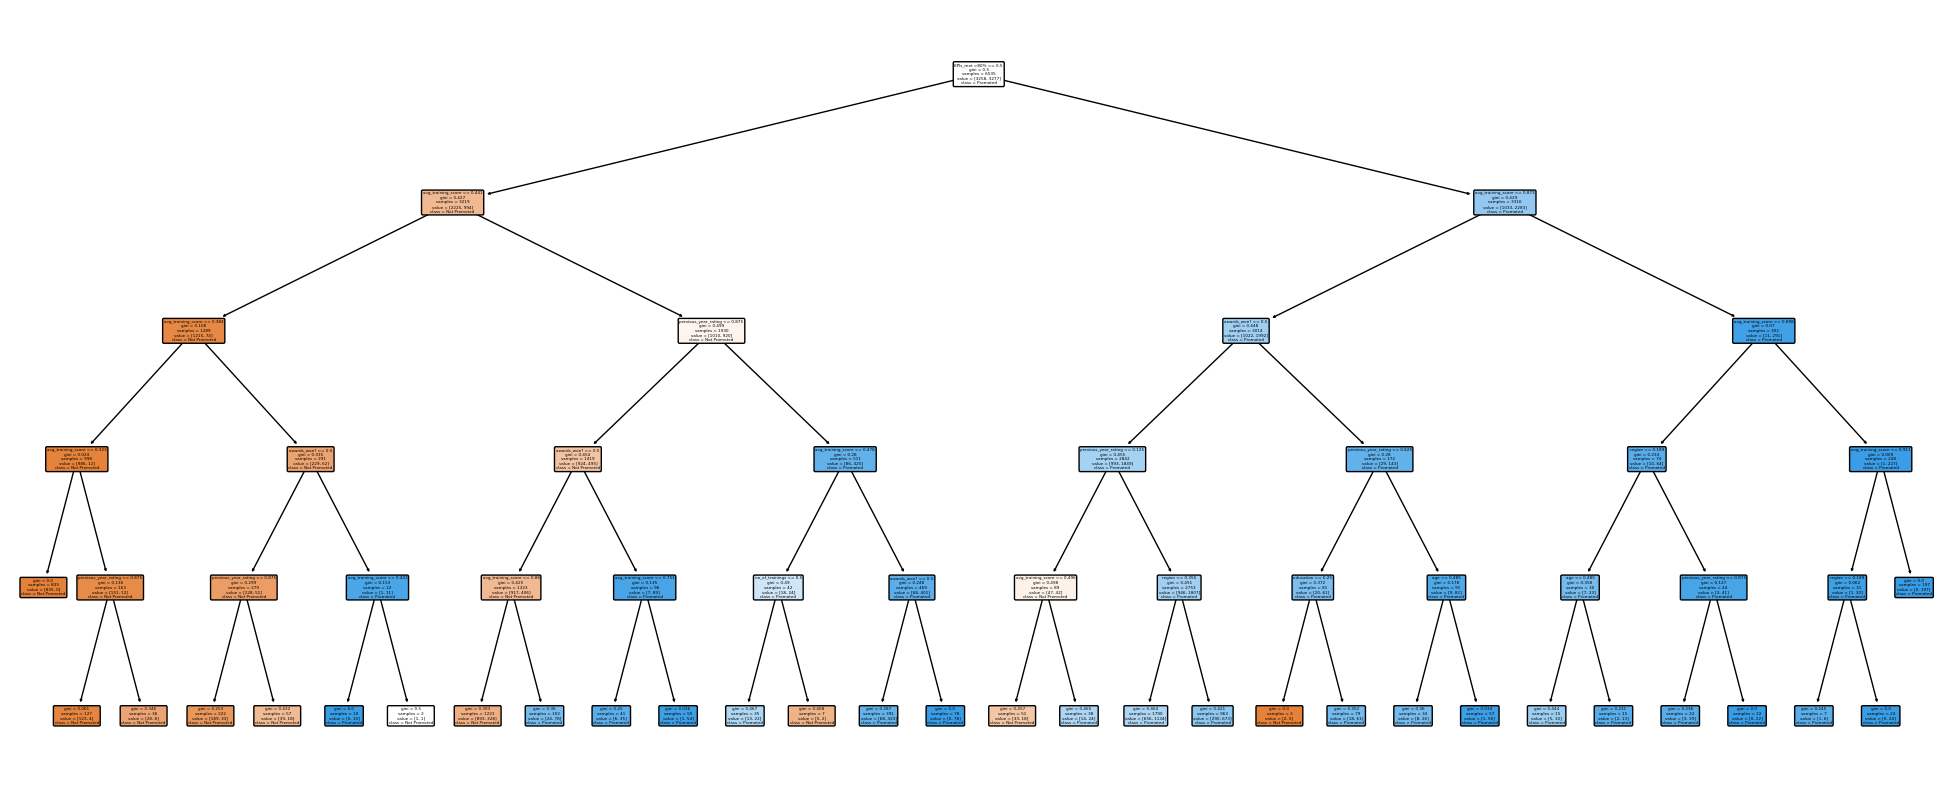

In [54]:
dt.fit(X_train, y_train)
plt.figure(figsize=(25,10))
plot_tree(dt, feature_names=list(X_train.columns), class_names=['Not Promoted', 'Promoted'], rounded=True, filled=True)
plt.show()

Create confusion matrix

#### Random Forest Classifier

In [165]:
print('training accuracy is: ', rf.score(X_train,y_train))
print('testing accuracy is: ', rf.score(X_test,y_test))

training accuracy is:  0.9925019127773527
testing accuracy is:  0.7222420564084255


In [166]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test) 
print(classification_report(y_pred, y_test)) 

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1334
           1       0.75      0.71      0.73      1467

    accuracy                           0.72      2801
   macro avg       0.72      0.72      0.72      2801
weighted avg       0.72      0.72      0.72      2801



In [59]:
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes):
    """
    Objective function to maximize for cross-validated random forest performance.
    """
    # Convert hyperparameters to integer values as they are continuous variables
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    max_leaf_nodes = int(max_leaf_nodes)
    #max_features = int(max_features)
    #max_features_mapping = {0: 'sqrt', 1: 'log2', 2: None}
    #max_features_value = max_features_mapping[int(max_features)]

    # Create a RandomForestClassifier with specified hyperparameters
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        #max_features = max_features,
        random_state=42
    )

    # Calculate cross-validated accuracy
    accuracy = cross_val_score(rf_classifier, X_data, Y_data, scoring='accuracy', cv=5).mean()

    return accuracy

In [60]:
#'max_features' : ['sqrt', 'log2', None] = (0,2)

# explore more
pbounds = {
    'n_estimators': (10, 20),
    'max_depth': (1, 32),
    'min_samples_split': (2, 20), # increasing helps limit tree growth 
    'min_samples_leaf': (2, 20), #Increasing this value can lead to more generalized and robust trees.
    'max_leaf_nodes' : (5, 32), #Controlling the maximum number of leaf nodes helps control the complexity of the tree.

    #'max_features' : (2, 40),
}

In [61]:
rf_bo = BayesianOptimization(f=rf_cv, pbounds=pbounds, random_state=42)

# Maximize the objective function
rf_bo.maximize(init_points=5, n_iter=10)

|   iter    |  target   | max_depth | max_le... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.7609    | 12.61     | 30.67     | 15.18     | 12.78     | 11.56     |
| 2         | 0.759     | 5.836     | 6.568     | 17.59     | 12.82     | 17.08     |
| 3         | 0.7134    | 1.638     | 31.19     | 16.98     | 5.822     | 11.82     |
| 4         | 0.7607    | 6.686     | 13.21     | 11.45     | 9.775     | 12.91     |
| 5         | 0.7594    | 19.97     | 8.766     | 7.259     | 8.595     | 14.56     |
| 6         | 0.7596    | 7.291     | 8.88      | 13.27     | 11.39     | 15.76     |
| 7         | 0.7602    | 19.39     | 21.8      | 12.45     | 17.77     | 11.92     |
| 8         | 0.7611    | 24.93     | 32.0      | 19.95     | 13.79     | 10.01     |
| 9         | 0.7512    | 22.14     | 32.0      | 4.344     | 11.61     | 10.73     |
| 10        | 0.7619    | 18.18     | 30.68     | 17.8

In [62]:
best_params = rf_bo.max['params']
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 18.182886147525103, 'max_leaf_nodes': 30.683545597692902, 'min_samples_leaf': 17.81407513755127, 'min_samples_split': 17.960974360164094, 'n_estimators': 19.93472566494513}


In [63]:
rf_new = RandomForestClassifier(n_estimators = int(19.93472566494513), # decrease
                            max_depth = int(18.182886147525103), # defined
                            min_samples_leaf = int(17.81407513755127), # increased
                            min_samples_split = int(17.960974360164094), # increased
                            max_leaf_nodes = int(30.683545597692902) ) # defined
rf_new.fit(X_train,y_train)

RandomForestClassifier(max_depth=18, max_leaf_nodes=30, min_samples_leaf=17,
                       min_samples_split=17, n_estimators=19)

In [64]:
print('training accuracy is: ', rf_new.score(X_train,y_train))
print('testing accuracy is: ', rf_new.score(X_test,y_test))

training accuracy is:  0.7651109410864575
testing accuracy is:  0.7533023920028561


##### Feature Selection

In [100]:
rfFeatures = pd.DataFrame({'Features':X_train.columns.tolist(),'Importances':rf_new.feature_importances_})
rfFeatures.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
7,KPIs_met >80%,0.311165
9,avg_training_score,0.303525
6,previous_year_rating,0.142719
5,age,0.076123
8,awards_won?,0.064868
0,region,0.047171
3,recruitment_channel,0.018340
2,gender,0.014657
1,education,0.013463
4,no_of_trainings,0.007968


In [113]:
# we can try polynomial expansion based on top 3 features as they seem to have high importance

In [74]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

poly.fit(X_train[['KPIs_met >80%', 'avg_training_score', 'previous_year_rating']])

X_train_poly = poly.transform(X_train[['KPIs_met >80%', 'avg_training_score', 'previous_year_rating']])
X_test_poly = poly.transform(X_test[['KPIs_met >80%', 'avg_training_score', 'previous_year_rating']])

In [75]:
X_train_poly = pd.DataFrame(X_train_poly)
X_test_poly = pd.DataFrame(X_test_poly)

# add column names of created features
X_train_poly.columns = poly.get_feature_names_out(['KPIs_met >80%', 'avg_training_score', 'previous_year_rating'])
X_test_poly.columns = poly.get_feature_names_out(['KPIs_met >80%', 'avg_training_score', 'previous_year_rating'])

X_test_poly.head()

,KPIs_met >80%,avg_training_score,previous_year_rating,KPIs_met >80%^2,KPIs_met >80% avg_training_score,KPIs_met >80% previous_year_rating,avg_training_score^2,avg_training_score previous_year_rating,previous_year_rating^2,KPIs_met >80%^3,KPIs_met >80%^2 avg_training_score,KPIs_met >80%^2 previous_year_rating,KPIs_met >80% avg_training_score^2,KPIs_met >80% avg_training_score previous_year_rating,KPIs_met >80% previous_year_rating^2,avg_training_score^3,avg_training_score^2 previous_year_rating,avg_training_score previous_year_rating^2,previous_year_rating^3
0,1.0,0.840312,0.50,1.0,0.840312,0.50,0.706124,0.420156,0.2500,1.0,0.840312,0.50,0.706124,0.420156,0.2500,0.593365,0.353062,0.210078,0.125000
1,1.0,0.891883,0.25,1.0,0.891883,0.25,0.795456,0.222971,0.0625,1.0,0.891883,0.25,0.795456,0.222971,0.0625,0.709453,0.198864,0.055743,0.015625
2,1.0,0.606800,0.50,1.0,0.606800,0.50,0.368206,0.303400,0.2500,1.0,0.606800,0.50,0.368206,0.303400,0.2500,0.223428,0.184103,0.151700,0.125000
3,0.0,0.540053,0.50,0.0,0.000000,0.00,0.291657,0.270027,0.2500,0.0,0.000000,0.00,0.000000,0.000000,0.0000,0.157511,0.145829,0.135013,0.125000
4,1.0,0.744005,0.50,1.0,0.744005,0.50,0.553543,0.372002,0.2500,1.0,0.744005,0.50,0.553543,0.372002,0.2500,0.411839,0.276772,0.186001,0.125000


In [76]:
X_train_poly = pd.concat([X_train,X_train_poly], axis=1)

X_test_poly = X_test_poly.set_index(X_test.index)
X_test_poly = pd.concat([X_test,X_test_poly], axis=1)

In [160]:
rf_new = RandomForestClassifier(n_estimators = int(182.34867416106383),
                            max_depth = int(30.084539917735597), 
                            min_samples_leaf = int(8.323203469884096),
                            min_samples_split = int(2.401625849414202) )
rf_new.fit(X_train_poly,y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=8, n_estimators=182)

In [161]:
print('training accuracy is: ', rf_new.score(X_train_poly,y_train))
print('testing accuracy is: ', rf_new.score(X_test_poly,y_test))

training accuracy is:  0.7970925784238715
testing accuracy is:  0.7611567297393788


Slight deterioration from without poly expansion

#### Gradient Boosting Classifier

In [75]:
print('training accuracy is: ', gbc.score(X_train,y_train))
print('testing accuracy is: ', gbc.score(X_test,y_test))

training accuracy is:  0.7319051262433053
testing accuracy is:  0.7158157800785434


##### Model Complexity

In [82]:
param_grid = { "max_depth" : [5, 10, 15, 20], 
              "n_estimators": [100, 200, 300] }

gs = GridSearchCV(estimator=gbc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.7153787299158377
{'max_depth': 10, 'n_estimators': 100}


In [96]:
gbc_1 = GradientBoostingClassifier(
                            max_depth = 10,
                            n_estimators = 100,
                            learning_rate = 1.0,
                            random_state = 42
                            )
gbc_1.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=10, random_state=42)

In [97]:
print(gbc_1.score(X_train,y_train))
print(gbc_1.score(X_test,y_test))

0.9957153787299159
0.7161727954302035


##### Learning rate, subsample

In [92]:
def gbc_bayesian2(learning_rate, subsample):
    """
    Objective function to maximize for cross-validated random forest performance.
    """
    # Convert hyperparameters to integer values as they are continuous variables
    learning_rate = float(learning_rate)
    subsample = float(subsample)

    # Create a RandomForestClassifier with specified hyperparameters
    GBM_classifier = GradientBoostingClassifier(
        max_depth = 10, 
        n_estimators = 100,
        learning_rate = learning_rate,
        subsample = subsample,
        random_state=42
    )

    # Calculate cross-validated accuracy
    accuracy = cross_val_score(GBM_classifier, X_data, Y_data, scoring='accuracy', cv=5).mean()

    return accuracy

In [93]:
pbounds = {
    'learning_rate' : (0.001, 1),
    'subsample' : (0.5, 1.0)
}

In [94]:
gbc_bo = BayesianOptimization(f = gbc_bayesian2, pbounds=pbounds, random_state=42)

# Maximize the objective function
gbc_bo.maximize(init_points=5, n_iter=20)

|   iter    |  target   | learni... | subsample |
-------------------------------------------------
| 1         | 0.7183    | 0.3752    | 0.9754    |
| 2         | 0.6435    | 0.7323    | 0.7993    |
| 3         | 0.7186    | 0.1569    | 0.578     |
| 4         | 0.7388    | 0.05903   | 0.9331    |
| 5         | 0.6871    | 0.6015    | 0.854     |
| 6         | 0.7192    | 0.2006    | 0.8089    |
| 7         | 0.7543    | 0.001     | 0.7498    |
| 8         | 0.7567    | 0.001     | 0.5       |
| 9         | 0.7553    | 0.001     | 0.6168    |
| 10        | 0.746     | 0.002664  | 0.9919    |
| 11        | 0.7516    | 0.001     | 0.854     |
| 12        | 0.7589    | 0.002715  | 0.5479    |
| 13        | 0.5646    | 0.9879    | 0.5018    |
| 14        | 0.7572    | 0.001     | 0.541     |
| 15        | 0.7142    | 1.0       | 1.0       |
| 16        | 0.6622    | 0.4751    | 0.5       |
| 17        | 0.7179    | 0.2066    | 0.9969    |
| 18        | 0.7184    | 0.6984    | 1.0       |


In [95]:
best_params = gbc_bo.max['params']
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.0027152900679729124, 'subsample': 0.5479190369866818}


In [98]:
gbc_2 = GradientBoostingClassifier(
                            max_depth = 10, 
                            learning_rate = 0.0027152900679729124,
                            n_estimators = 100,
                            subsample = 0.5479190369866818,
                            random_state = 42)
gbc_2.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.0027152900679729124, max_depth=10,
                           random_state=42, subsample=0.5479190369866818)

In [99]:
print(gbc_2.score(X_train,y_train))
print(gbc_2.score(X_test,y_test))

0.808416220351951
0.750089253837915


##### GridSearch (Miscellaneous Parameters): Criterion and Loss

In [100]:
param_grid = { "loss" : ["log_loss", "exponential"], 
              "criterion": ["friedman_mse" , "squared_error"] }

gs = GridSearchCV(estimator=gbc_2, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.754858454475899
{'criterion': 'squared_error', 'loss': 'exponential'}


In [101]:
gbc_3 = GradientBoostingClassifier(
                            max_depth = 10, 
                            learning_rate = 0.0027152900679729124,
                            n_estimators = 100,
                            subsample = 0.5479190369866818,
                            criterion = 'squared_error',
                            loss = 'exponential',
                            random_state = 42)
gbc_3.fit(X_train,y_train)

GradientBoostingClassifier(criterion='squared_error',
                           learning_rate=0.0027152900679729124,
                           loss='exponential', max_depth=10, random_state=42,
                           subsample=0.5479190369866818)

In [102]:
print(gbc_3.score(X_train, y_train))
print(gbc_3.score(X_test, y_test))

0.8067329762815608
0.7511602998928953


In [105]:
gbcFeatures = pd.DataFrame({'Features':X_train.columns.tolist(),'Importances':gbc_3.feature_importances_})
gbcFeatures.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
9,avg_training_score,0.325628
7,KPIs_met >80%,0.268503
6,previous_year_rating,0.137148
5,age,0.093994
8,awards_won?,0.054334
0,region,0.050051
3,recruitment_channel,0.021205
2,gender,0.018948
1,education,0.018718
4,no_of_trainings,0.011471


In [113]:
X_train_gbc = X_train[["KPIs_met >80%", "avg_training_score", "previous_year_rating", "age", "awards_won?", "region"]]
X_test_gbc = X_test[["KPIs_met >80%", "avg_training_score", "previous_year_rating", "age", "awards_won?","region"]]

In [114]:
gbc_3.fit(X_train_gbc,y_train)

GradientBoostingClassifier(criterion='squared_error',
                           learning_rate=0.0027152900679729124,
                           loss='exponential', max_depth=10, random_state=42,
                           subsample=0.5479190369866818)

In [115]:
print(gbc_3.score(X_train_gbc, y_train))
print(gbc_3.score(X_test_gbc, y_test))

0.8013771996939556
0.7493752231345948


#### Gaussian Process Classifier

no explicit complexity hyperparameter

In [59]:
print('training accuracy is: ', gaussian_process.score(X_train,y_train))
print('testing accuracy is: ', gaussian_process.score(X_test,y_test))

training accuracy is:  0.7551644988523336
testing accuracy is:  0.7447340235630132


Base performance is quite good

We can first try different kernels, Gaussian Process is a kernel-based model, similar to Support Vectors

In [14]:
kernels = [1*DotProduct(), 1*Matern(),  1*RationalQuadratic()]  # default kernel is RBF

train_acc = []
test_acc = []

for kernel in kernels:
    # Create Gaussian Process Model
    gaussian_process = GaussianProcessClassifier(kernel=kernel, random_state = 42)
    
    # Fit the model
    gaussian_process.fit(X_train, y_train)
     
    # Evaluate on training set
    train_acc.append(gaussian_process.score (X_train, y_train))
    test_acc.append(gaussian_process.score(X_test, y_test))

In [15]:
train_acc

[0.7224177505738332, 0.7628156082631982, 0.7649579188982403]

In [16]:
test_acc

[0.7190289182434845, 0.7504462691895751, 0.7497322384862549]

Matern (index 2) seems to produce the best test performance out of the 4 kernels

Gaussian Process run times are very long, they take O(n^3) time to train, where n is the number of data points in the training set

It may be more efficient to tune manually than use GridSearch or Bayesian Optimisation as they run multiple iterations

##### Length Scale

In [66]:
length_scale = [0.1, 0.5, 2.0, 5.0]  # default length_scale is 1.0

train_acc = []
test_acc = []

for value in length_scale:
    # Create Gaussian Process Model
    
    kernel = 1*Matern(length_scale = value)
    gaussian_process = GaussianProcessClassifier(kernel=kernel, random_state = 42)
    
    # Fit the model
    gaussian_process.fit(X_train, y_train)
     
    # Evaluate on training set
    train_acc.append(gaussian_process.score (X_train, y_train))
    test_acc.append(gaussian_process.score(X_test, y_test))

In [67]:
train_acc

[0.7634276970160673,
 0.7634276970160673,
 0.7634276970160673,
 0.7634276970160673]

In [68]:
test_acc

[0.7515173152445556,
 0.7515173152445556,
 0.7515173152445556,
 0.7515173152445556]

There seem to be no differences between length scales

This could be as underlying patterns in the data are relatively smooth and the length scale is already within a reasonable range, hence adjusting it did not have a significant impact.

##### Increasing number of n_restarts

Default value is 0 hence only one run is performed

In [72]:
kernel = 1*Matern(length_scale = 1.0)
gaussian_process = GaussianProcessClassifier(kernel=kernel, n_restarts_optimizer = 5,  random_state = 42)

gaussian_process.fit(X_train, y_train)

GaussianProcessClassifier(kernel=1**2 * Matern(length_scale=1, nu=1.5),
                          n_restarts_optimizer=5, random_state=42)

In [73]:
print('training accuracy is: ', gaussian_process.score(X_train,y_train))
print('testing accuracy is: ', gaussian_process.score(X_test,y_test))

training accuracy is:  0.7634276970160673
testing accuracy is:  0.7515173152445556


no difference at all, may have reached global optimum in one run

##### Feature Engineering

In [17]:
kernel = 1*Matern(length_scale = 1.0)
gaussian_process = GaussianProcessClassifier(kernel=kernel, random_state = 42)

gaussian_process.fit(X_train, y_train)

GaussianProcessClassifier(kernel=1**2 * Matern(length_scale=1, nu=1.5),
                          random_state=42)

In [21]:
from sklearn.inspection import permutation_importance
result = permutation_importance(gaussian_process, X_test, y_test, random_state=42)

# The importance scores can be accessed using result.importances_mean
importances = result.importances_mean

In [23]:
feature_names = X_test.columns  # Replace this with your actual feature names

# Creating a DataFrame to associate feature names with importance scores
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sorting the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Displaying the result
print(importance_df)

                Feature  Importance
7         KPIs_met >80%    0.151160
9    avg_training_score    0.057836
6  previous_year_rating    0.035487
8           awards_won?    0.018708
0                region    0.007283
4       no_of_trainings    0.004855
3   recruitment_channel    0.004498
1             education    0.004427
5                   age    0.002071
2                gender    0.000928


Did poly expansion, degree = 3

In [77]:
kernel = 1*Matern(length_scale = 1.0)
gaussian_process = GaussianProcessClassifier(kernel=kernel, n_restarts_optimizer = 5,  random_state = 42)
gaussian_process.fit(X_train_poly,y_train)

GaussianProcessClassifier(kernel=1**2 * Matern(length_scale=1, nu=1.5),
                          n_restarts_optimizer=5, random_state=42)

In [78]:
print('training accuracy is: ', gaussian_process.score(X_train_poly,y_train))
print('testing accuracy is: ', gaussian_process.score(X_test_poly,y_test))

training accuracy is:  0.7727620504973222
testing accuracy is:  0.7622277757943592


## 2. Airbnb

### 2.1 Load and Sample the data

In [2]:
listings_df = pd.read_csv('C:\\Users\\marke\\MACHINE LEARNING\\Assignment 1\\listings_train_test.csv')

listings_df.head()

,Unnamed: 0,host_id,neighbourhood,room_type,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,apart,apt,bedroom,br,citi,mrt,near,room,price
0,5154,0.108964,0.068982,1.000000,0.137931,0.000000,0.72417,0.559406,0.764384,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,228
1,4456,0.324816,0.854678,1.000000,1.000000,0.000000,0.72417,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,394
2,5466,0.261713,0.036234,0.564365,0.000000,0.205128,1.00000,0.019802,0.838356,0.0,0.0,0.0,0.0,0.0,0.702366,0.0,0.711816,90
3,3214,0.008282,0.068982,0.564365,0.586207,0.025641,1.00000,0.549505,0.909589,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,60
4,538,0.021859,0.197201,0.564365,0.000000,0.000000,0.72417,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,219


In [3]:
listings_df = listings_df.drop(columns=['Unnamed: 0'])
listings_df.head()

,host_id,neighbourhood,room_type,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,apart,apt,bedroom,br,citi,mrt,near,room,price
0,0.108964,0.068982,1.000000,0.137931,0.000000,0.72417,0.559406,0.764384,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,228
1,0.324816,0.854678,1.000000,1.000000,0.000000,0.72417,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,394
2,0.261713,0.036234,0.564365,0.000000,0.205128,1.00000,0.019802,0.838356,0.0,0.0,0.0,0.0,0.0,0.702366,0.0,0.711816,90
3,0.008282,0.068982,0.564365,0.586207,0.025641,1.00000,0.549505,0.909589,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,60
4,0.021859,0.197201,0.564365,0.000000,0.000000,0.72417,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,219


In [4]:
# split at index 4414

listings_train_set = listings_df[:4414]
listings_test_set = listings_df[4414:]

listings_train_set.shape, listings_test_set.shape

((4414, 17), (1893, 17))

In [5]:
listings_df = pd.concat([listings_train_set, listings_test_set], axis=0)

listing_y_data = listings_df[listings_df.columns[-1]]
listing_x_data = listings_df[listings_df.columns[:-1]]
listing_x_data

,host_id,neighbourhood,room_type,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,apart,apt,bedroom,br,citi,mrt,near,room
0,0.108964,0.068982,1.000000,0.137931,0.000000,0.724170,0.559406,0.764384,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1,0.324816,0.854678,1.000000,1.000000,0.000000,0.724170,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2,0.261713,0.036234,0.564365,0.000000,0.205128,1.000000,0.019802,0.838356,0.000000,0.0,0.000000,0.000000,0.0,0.702366,0.0,0.711816
3,0.008282,0.068982,0.564365,0.586207,0.025641,1.000000,0.549505,0.909589,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
4,0.021859,0.197201,0.564365,0.000000,0.000000,0.724170,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6302,0.696639,0.140069,1.000000,0.068966,0.000000,0.724170,0.326733,0.956164,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.000000
6303,0.135933,0.068982,1.000000,0.000000,0.000000,0.724170,0.004950,0.000000,0.756084,0.0,0.000000,0.654475,0.0,0.000000,0.0,0.000000
6304,0.418137,0.197201,1.000000,0.137931,0.051282,1.000000,0.024752,0.150685,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
6305,0.039752,0.000000,1.000000,0.000000,0.076923,0.076671,0.000000,0.000000,0.000000,0.0,0.742457,0.000000,0.0,0.669894,0.0,0.000000


In [6]:
X_train_listings = listings_train_set[listings_train_set.columns[:-1]]
y_train_listings = listings_train_set[listings_train_set.columns[-1]]


In [7]:
y_train_listings

0       228
1       394
2        90
3        60
4       219
       ... 
4409    287
4410     62
4411    165
4412     89
4413    144
Name: price, Length: 4414, dtype: int64

In [8]:
X_test_listings = listings_test_set[listings_test_set.columns[:-1]]
y_test_listings = listings_test_set[listings_test_set.columns[-1]]

In [9]:
X_test_listings

,host_id,neighbourhood,room_type,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,apart,apt,bedroom,br,citi,mrt,near,room
4414,0.760808,0.140069,1.000000,0.068966,0.000000,0.724170,0.554455,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4415,0.380478,0.136668,0.564365,0.000000,0.000000,0.724170,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4416,0.403257,0.026730,0.564365,0.034483,0.025641,1.000000,0.004950,0.024658,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4417,0.230060,0.197201,1.000000,1.000000,0.051282,1.000000,1.000000,0.802740,0.000000,0.632762,0.000000,0.522409,0.0,0.000000,0.571577,0.0
4418,0.230060,0.309706,1.000000,0.241379,0.025641,1.000000,1.000000,0.000000,0.000000,0.561487,0.000000,0.463564,0.0,0.461080,0.507194,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6302,0.696639,0.140069,1.000000,0.068966,0.000000,0.724170,0.326733,0.956164,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0
6303,0.135933,0.068982,1.000000,0.000000,0.000000,0.724170,0.004950,0.000000,0.756084,0.000000,0.000000,0.654475,0.0,0.000000,0.000000,0.0
6304,0.418137,0.197201,1.000000,0.137931,0.051282,1.000000,0.024752,0.150685,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
6305,0.039752,0.000000,1.000000,0.000000,0.076923,0.076671,0.000000,0.000000,0.000000,0.000000,0.742457,0.000000,0.0,0.669894,0.000000,0.0


### 2.2 Build the Model(s)

#### Multi-layer perceptron

In [206]:
mlp = MLPRegressor()
# Fit the model to the training set
mlp.fit(X_train_listings,y_train_listings)

C:\Users\marke\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLPRegressor()

#### Gradient Boost

In [129]:
xgb = XGBRegressor()
xgb.fit(X_train_listings,y_train_listings)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Support Vector Regressor

In [90]:
svr = SVR(C=1, kernel = 'rbf')
svr.fit(X_train_listings, y_train_listings)

SVR(C=1)

### 2.3 Evaluate and Improve the Model(s)

#### Multi-layer perceptron

In [207]:
print('the training mean squared error is: ', mean_squared_error(mlp.predict(X_train_listings), y_train_listings))
print('the testing mean squared error is: ', mean_squared_error(mlp.predict(X_test_listings), y_test_listings))

print('the training R2 Squared is: ', r2_score(y_train_listings, mlp.predict(X_train_listings)))
print('the testing R2 Squared is: ', r2_score(y_test_listings, mlp.predict(X_test_listings)))

the training mean squared error is:  5607.148906664161
the testing mean squared error is:  5394.525673748996
the training R2 Squared is:  0.43770953235794574
the testing R2 Squared is:  0.432221337047182


As seen from the MSE and R Squared, our Multi-layer perception model is underfitting.

##### Tuning

Try different training parameters to improve convergence speed, namely learning rate, activation function and solver for weight optimization

In [258]:
param_grid =  { "activation" : ['identity', 'logistic', 'tanh', 'relu'], # default relu
               "solver" : ['lbfgs', 'sgd', 'adam'], # default is adam
                'learning_rate_init': [0.0001, 0.001, 0.01, 0.1], # default is 0.001
              }

In [259]:
gs = GridSearchCV(mlp, param_grid=param_grid, scoring=['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train_listings, y_train_listings) # 

print(gs.best_score_)
print(gs.best_params_)

C:\Users\marke\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\marke\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\marke\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\marke\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 753, in fit
    return self._fit(X, y, incremental=False)
  F

-4764.347560155834
{'activation': 'logistic', 'learning_rate_init': 0.1, 'solver': 'adam'}


C:\Users\marke\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [212]:
mlp = MLPRegressor(activation = 'logistic', solver = 'adam', learning_rate_init = 0.1, random_state = 42)
mlp.fit(X_train_listings, y_train_listings)


C:\Users\marke\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLPRegressor(activation='logistic', learning_rate_init=0.1, random_state=42)

In [236]:
iterations = [200, 300, 400, 500]

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

for value in iterations:
    mlp_manual1 = MLPRegressor(activation = 'logistic', solver = 'adam', learning_rate_init = 0.1, max_iter = value, random_state = 42)
    
    mlp_manual1.fit(X_train_listings, y_train_listings) 
    train_mse.append(mean_squared_error(mlp_manual1.predict(X_train_listings), y_train_listings))
    test_mse.append(mean_squared_error(mlp_manual1.predict(X_test_listings), y_test_listings))

    train_r2.append(r2_score(y_train_listings, mlp_manual1.predict(X_train_listings)))
    test_r2.append(r2_score(y_test_listings, mlp_manual1.predict(X_test_listings)))

C:\Users\marke\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
C:\Users\marke\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
C:\Users\marke\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.


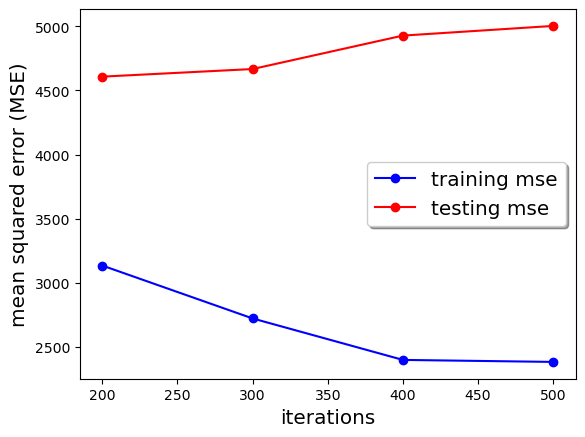

In [237]:
plt.plot(iterations, train_mse, 'bo-', label ='training mse')
plt.plot(iterations, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('iterations', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

iteration 500 no more warning but the model experiences drastic overfitting

In [221]:
l2_rate = [0.001, 0.01, 0.1, 0.2] # default=0.0001

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

for value in l2_rate:
    # Create Random Forest Model
    mlp_manual1 = MLPRegressor(activation = 'logistic', 
                       solver = 'adam', 
                       learning_rate_init = 0.1, 
                       max_iter = 500,
                        alpha = value,
                       random_state = 42)
    
    mlp_manual1.fit(X_train_listings, y_train_listings) 
    train_mse.append(mean_squared_error(mlp_manual1.predict(X_train_listings), y_train_listings))
    test_mse.append(mean_squared_error(mlp_manual1.predict(X_test_listings), y_test_listings))

    train_r2.append(r2_score(y_train_listings, mlp_manual1.predict(X_train_listings)))
    test_r2.append(r2_score(y_test_listings, mlp_manual1.predict(X_test_listings)))

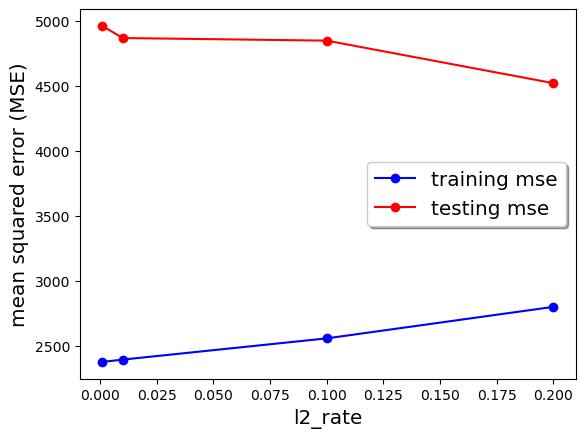

In [222]:
plt.plot(l2_rate, train_mse, 'bo-', label ='training mse')
plt.plot(l2_rate, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('l2_rate', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

continue increasing l2 rate

In [224]:
l2_rate = [0.2, 0.3, 0.4, 0.5]

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

for value in l2_rate:
    # Create Random Forest Model
    mlp_manual1 = MLPRegressor(activation = 'logistic', 
                       solver = 'adam', 
                       learning_rate_init = 0.1, 
                       max_iter = 500,
                        alpha = value,
                       random_state = 42)
    
    mlp_manual1.fit(X_train_listings, y_train_listings) 
    train_mse.append(mean_squared_error(mlp_manual1.predict(X_train_listings), y_train_listings))
    test_mse.append(mean_squared_error(mlp_manual1.predict(X_test_listings), y_test_listings))

    train_r2.append(r2_score(y_train_listings, mlp_manual1.predict(X_train_listings)))
    test_r2.append(r2_score(y_test_listings, mlp_manual1.predict(X_test_listings)))

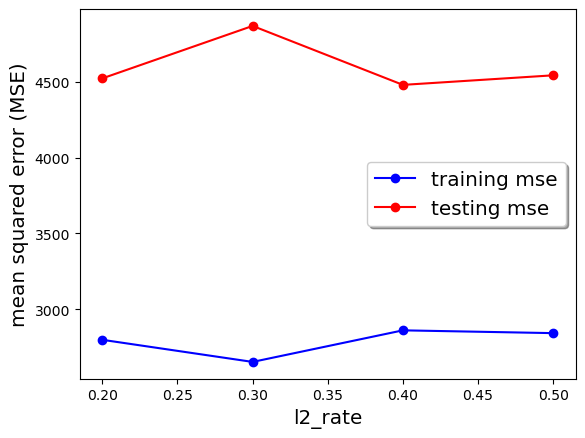

In [225]:
plt.plot(l2_rate, train_mse, 'bo-', label ='training mse')
plt.plot(l2_rate, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('l2_rate', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

use 0.4, reduce model complexity

In [247]:
hidden_layer_sizes = [(10,), (20,) , (30,) , (50,) , (70,), (90,)] # default is (100,)

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

for value in hidden_layer_sizes:
    # Create Random Forest Model
    mlp_manual1 = MLPRegressor(activation = 'logistic', 
                       solver = 'adam', 
                       learning_rate_init = 0.1, 
                       max_iter = 500,
                        alpha = 0.4,
                        hidden_layer_sizes = value,
                       random_state = 42)
    
    mlp_manual1.fit(X_train_listings, y_train_listings) 
    train_mse.append(mean_squared_error(mlp_manual1.predict(X_train_listings), y_train_listings))
    test_mse.append(mean_squared_error(mlp_manual1.predict(X_test_listings), y_test_listings))

    train_r2.append(r2_score(y_train_listings, mlp_manual1.predict(X_train_listings)))
    test_r2.append(r2_score(y_test_listings, mlp_manual1.predict(X_test_listings)))

In [248]:
print(train_mse)
print(test_mse)

[4742.545377889193, 4104.183754931039, 3982.8540487036303, 3761.961361327383, 3102.455844290601, 2792.8888294745047]
[4812.225408812277, 4536.955513577208, 4625.175156513732, 4537.428580322494, 4629.7411258570055, 4522.222638880571]


In [249]:
print(train_r2)
print(test_r2)

[0.5244128339132232, 0.5884283721970863, 0.6005954357777235, 0.6227467741051005, 0.6888826431108954, 0.7199263311643047]
[0.4935089619206169, 0.52248136515308, 0.5131961686516673, 0.5224315744540693, 0.5127155962852361, 0.5240320134218264]


In [10]:
mlp_tuned2 = MLPRegressor(activation = 'logistic', 
                       solver = 'adam', 
                       learning_rate_init = 0.1, 
                       max_iter = 500,
                        alpha = 0.4,
                        hidden_layer_sizes = (10,),
                       random_state = 42)
    
mlp_tuned2.fit(X_train_listings, y_train_listings)

MLPRegressor(activation='logistic', alpha=0.4, hidden_layer_sizes=(10,),
             learning_rate_init=0.1, max_iter=500, random_state=42)

In [251]:
print('the training mean squared error is: ', mean_squared_error(mlp_tuned2.predict(X_train_listings), y_train_listings))
print('the testing mean squared error is: ', mean_squared_error(mlp_tuned2.predict(X_test_listings), y_test_listings))

print('the training R2 Squared is: ', r2_score(y_train_listings, mlp_tuned2.predict(X_train_listings)))
print('the testing R2 Squared is: ', r2_score(y_test_listings,mlp_tuned2.predict(X_test_listings)))

the training mean squared error is:  4742.545377889193
the testing mean squared error is:  4812.225408812277
the training R2 Squared is:  0.5244128339132232
the testing R2 Squared is:  0.4935089619206169


##### Feature Selection

In [252]:
mlp_finish_tuning_pvalue = sm.OLS(y_train_listings, X_train_listings).fit()
# Summary statistics from the model
mlp_finish_tuning_pvalue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              1395.
Date:                Thu, 08 Feb 2024   Prob (F-statistic):                        0.00
Time:                        19:01:32   Log-Likelihood:                         -25334.
No. Observations:                4414   AIC:                                  5.070e+04
Df Residuals:                    4398   BIC:                                  5.080e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
host_id                           10.4860      4.290      2.444      0.015       2.075      18.897
neighbourhood                    159.4054     11.688     13.639      0.000     136.492     182.319
room_type                        167.0775      3.955     42.248      0.000     159.324     174.831
minimum_nights                   -54.5815      3.411    -16.001      0.000     -61.269     -47.894
number_of_reviews                -26.5440      3.991     -6.652      0.000     -34.367     -18.720
last_review                       -6.6983      3.776     -1.774      0.076     -14.102       0.705
calculated_host_listings_count   -48.8701      4.877    -10.021      0.000     -58.431     -39.309
availability_365                  40.0459      2.986     13.410      0.000      34.191      45.900
apart                             12.6099      4.545      2.774      0.006       3.699      21.521
apt                               -6.1871      4.998     -1.238      0.216     -15.986       3.612
bedroom                           30.5097      4.345      7.022      0.000      21.991      39.028
br                                70.0531      4.491     15.600      0.000      61.249      78.857
citi                             -21.5329      4.764     -4.520      0.000     -30.872     -12.193
mrt                                4.2870      4.232      1.013      0.311      -4.011      12.585
near                               3.3569      4.698      0.715      0.475      -5.853      12.566
room                              -8.7735      3.451     -2.542      0.011     -15.540      -2.007
==============================================================================
Omnibus:                      867.420   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1677.290
Skew:                           1.192   Prob(JB):                         0.00
Kurtosis:                       4.855   Cond. No.                         14.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
dropped_features = ['apt','mrt','near', 'room'] # based on mutual info as well

X_train_new = X_train_listings.drop(dropped_features, axis =1)
X_test_new = X_test_listings.drop(dropped_features, axis = 1)

In [255]:
mlp_tuned2.fit(X_train_new, y_train_listings)

MLPRegressor(activation='logistic', alpha=0.4, hidden_layer_sizes=(10,),
             learning_rate_init=0.1, max_iter=500, random_state=42)

In [257]:
print('the training mean squared error is: ', mean_squared_error(mlp_tuned2.predict(X_train_new), y_train_listings))
print('the testing mean squared error is: ', mean_squared_error(mlp_tuned2.predict(X_test_new), y_test_listings))

print('the training R2 Squared is: ', r2_score(y_train_listings, mlp_tuned2.predict(X_train_new)))
print('the testing R2 Squared is: ', r2_score(y_test_listings,mlp_tuned2.predict(X_test_new)))

the training mean squared error is:  4657.796402513077
the testing mean squared error is:  4770.38034880439
the training R2 Squared is:  0.5329115454312612
the testing R2 Squared is:  0.49791319199742856


### XGBBoost

In [130]:
print('the training mean squared error is: ', mean_squared_error(xgb.predict(X_train_listings), y_train_listings))
print('the testing mean squared error is: ', mean_squared_error(xgb.predict(X_test_listings), y_test_listings))

print('the training R2 Squared is: ', r2_score(y_train_listings, xgb.predict(X_train_listings)))
print('the testing R2 Squared is: ', r2_score( y_test_listings, xgb.predict(X_test_listings)))

the training mean squared error is:  733.6133988302217
the testing mean squared error is:  3357.68384409986
the training R2 Squared is:  0.9264325189212549
the testing R2 Squared is:  0.6466007654948458


As we can see, the model experiences heavy overfitting as seen from the variance in training and test scores.

Tune model complexity first

In [158]:
max_depth = range(1,6)

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

for value in max_depth:
    # Create Random Forest Model
    xgb = XGBRegressor(max_depth = value)
    
    xgb.fit(X_train_listings, y_train_listings) 
    train_mse.append(mean_squared_error(xgb.predict(X_train_listings), y_train_listings))
    test_mse.append(mean_squared_error(xgb.predict(X_test_listings), y_test_listings))

    train_r2.append(r2_score(y_train_listings, xgb.predict(X_train_listings)))
    test_r2.append(r2_score(y_test_listings, xgb.predict(X_test_listings)))

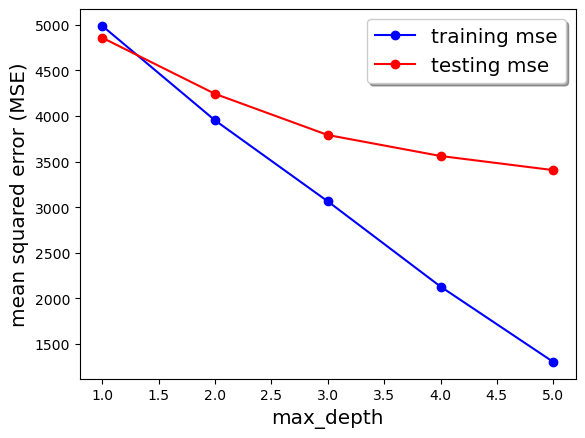

In [159]:
plt.plot(max_depth, train_mse, 'bo-', label ='training mse')
plt.plot(max_depth, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [166]:
xgb = XGBRegressor(max_depth = 3)
xgb.fit(X_train_listings,y_train_listings)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [167]:
print('the training mean squared error is: ', mean_squared_error(xgb.predict(X_train_listings), y_train_listings))
print('the testing mean squared error is: ', mean_squared_error(xgb.predict(X_test_listings), y_test_listings))

print('the training R2 Squared is: ', r2_score(y_train_listings, xgb.predict(X_train_listings)))
print('the testing R2 Squared is: ', r2_score( y_test_listings, xgb.predict(X_test_listings)))

the training mean squared error is:  3063.9752691514564
the testing mean squared error is:  3791.4495584998003
the training R2 Squared is:  0.692741513447727
the testing R2 Squared is:  0.6009465352155755


Regularization

In [160]:
# subsample, max_depth, gamma, lambda are hyperparameters to control overfitting and model complexity

def xgb_bayesian1(subsample, gamma, reg_lambda):

    subsample = float(subsample)
    gamma = float(gamma)
    reg_lambda = float(reg_lambda)

    xgbmodel = XGBRegressor(subsample = subsample, gamma = gamma, max_depth = 3, reg_lambda = reg_lambda, random_state = 42)

    # Calculate cross-validated accuracy
    mse = cross_val_score(xgbmodel, listing_x_data, listing_y_data, scoring='neg_mean_squared_error', cv=5).mean()

    return mse

In [168]:
pbounds = {
    'subsample': (0.5, 1), # default is 1, lower for more regularization
    'gamma': (1, 10), # default is 0, larger more convservative
    'reg_lambda': (1, 10), # default is 1, L2 regularization term
}


In [169]:
xgb_bo = BayesianOptimization(f=xgb_bayesian1, pbounds=pbounds, random_state=42)
xgb_bo.maximize(init_points=5, n_iter=10)

|   iter    |  target   |   gamma   | reg_la... | subsample |
-------------------------------------------------------------
| 1         | -3.955e+0 | 4.371     | 9.556     | 0.866     |
| 2         | -3.98e+03 | 6.388     | 2.404     | 0.578     |
| 3         | -3.987e+0 | 1.523     | 8.796     | 0.8006    |
| 4         | -3.95e+03 | 7.373     | 1.185     | 0.985     |
| 5         | -3.996e+0 | 8.492     | 2.911     | 0.5909    |
| 6         | -3.965e+0 | 4.446     | 9.498     | 0.7948    |
| 7         | -3.934e+0 | 7.135     | 1.106     | 0.9325    |
| 8         | -3.98e+03 | 6.971     | 1.328     | 0.7783    |
| 9         | -3.991e+0 | 7.317     | 1.065     | 0.7397    |
| 10        | -3.96e+03 | 7.278     | 1.169     | 0.9626    |
| 11        | -3.967e+0 | 7.051     | 1.124     | 0.8636    |
| 12        | -3.963e+0 | 7.354     | 1.269     | 0.9216    |
| 13        | -3.994e+0 | 4.282     | 9.554     | 0.7997    |
| 14        | -3.922e+0 | 7.107     | 1.076     | 0.9107    |
| 15    

In [170]:
best_params = xgb_bo.max['params']
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'gamma': 7.107174304893824, 'reg_lambda': 1.0755955505222525, 'subsample': 0.9106722607689798}


In [171]:
xgb_bo = XGBRegressor(subsample = 0.9106722607689798,
                      gamma = 7.107174304893824, 
                      max_depth = 3, 
                      reg_lambda = 1.0755955505222525, 
                      random_state = 42)

xgb_bo.fit(X_train_listings,y_train_listings)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=7.107174304893824, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [172]:
print('the training mean squared error is: ', mean_squared_error(xgb_bo.predict(X_train_listings), y_train_listings))
print('the testing mean squared error is: ', mean_squared_error(xgb_bo.predict(X_test_listings), y_test_listings))

print('the training R2 Squared is: ', r2_score(y_train_listings, xgb_bo.predict(X_train_listings)))
print('the testing R2 Squared is: ', r2_score( y_test_listings, xgb_bo.predict(X_test_listings)))

the training mean squared error is:  3016.091163351975
the testing mean squared error is:  3860.944494876351
the training R2 Squared is:  0.697543379189265
the testing R2 Squared is:  0.5936321308649057


Barely changed much,  change the feature space and include more regularization parameters

In [177]:
def xgb_bayesian2(subsample, gamma, reg_lambda, reg_alpha):

    subsample = float(subsample)
    gamma = float(gamma)
    reg_lambda = float(reg_lambda)
    reg_alpha = float(reg_alpha)

    xgbmodel = XGBRegressor(subsample = subsample, 
                            gamma = gamma, 
                            max_depth = 3, 
                            reg_lambda = reg_lambda, 
                            reg_alpha = reg_alpha,
                            random_state = 42)

    # Calculate cross-validated accuracy
    mse = cross_val_score(xgbmodel, listing_x_data, listing_y_data, scoring='neg_mean_squared_error', cv=5).mean()

    return mse

In [178]:
pbounds2 = {
    'subsample': (0.5, 0.8), # default is 1
    'gamma': (6, 10), # default is 0
    'reg_lambda': (5, 20), # default is 1, L2 regularization term
    'reg_alpha' : (5, 10), # default is 0, L1 regularization term
}

In [179]:
xgb_bo2 = BayesianOptimization(f=xgb_bayesian2, pbounds=pbounds2, random_state=42)
xgb_bo2.maximize(init_points=5, n_iter=10)

|   iter    |  target   |   gamma   | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------
| 1         | -3.984e+0 | 7.498     | 9.754     | 15.98     | 0.6796    |
| 2         | -3.973e+0 | 6.624     | 5.78      | 5.871     | 0.7599    |
| 3         | -3.982e+0 | 8.404     | 8.54      | 5.309     | 0.791     |
| 4         | -4.017e+0 | 9.33      | 6.062     | 7.727     | 0.555     |
| 5         | -4.002e+0 | 7.217     | 7.624     | 11.48     | 0.5874    |
| 6         | -3.983e+0 | 8.439     | 8.619     | 5.375     | 0.6712    |
| 7         | -3.974e+0 | 6.0       | 7.323     | 5.0       | 0.8       |
| 8         | -3.991e+0 | 10.0      | 10.0      | 20.0      | 0.8       |
| 9         | -3.966e+0 | 6.0       | 5.0       | 5.0       | 0.8       |
| 10        | -4.008e+0 | 6.0       | 5.0       | 20.0      | 0.5       |
| 11        | -3.953e+0 | 6.0       | 10.0      | 5.0       | 0.8       |
| 12        | -3.969e+0 | 6.0       | 

In [180]:
best_params = xgb_bo2.max['params']
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'gamma': 6.0, 'reg_alpha': 10.0, 'reg_lambda': 5.0, 'subsample': 0.8}


In [181]:
xgb_bo2 = XGBRegressor(subsample = 0.8, 
                       gamma = 6, 
                       max_depth = 3, 
                       reg_lambda = 5.0, 
                       reg_alpha = 10.0,
                       random_state = 42)

xgb_bo2.fit(X_train_listings,y_train_listings)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=6, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [182]:
print('the training mean squared error is: ', mean_squared_error(xgb_bo2.predict(X_train_listings), y_train_listings))
print('the testing mean squared error is: ', mean_squared_error(xgb_bo2.predict(X_test_listings), y_test_listings))

print('the training R2 Squared is: ', r2_score(y_train_listings, xgb_bo2.predict(X_train_listings)))
print('the testing R2 Squared is: ', r2_score( y_test_listings, xgb_bo2.predict(X_test_listings)))

the training mean squared error is:  3108.1870348246966
the testing mean squared error is:  3772.203848297491
the training R2 Squared is:  0.6883079136255179
the testing R2 Squared is:  0.6029721634667153


Learning Rate (eta):

Description: Learning rate is a hyperparameter that scales the contribution of each tree in the ensemble. A lower learning rate requires more boosting rounds but can lead to a more robust model.
Typical Range: [0, 1]
Default: 0.3

In [188]:
eta = [0.01, 0.05, 0.1, 0.15, 0.2] # smaller learning rates

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

for value in eta:
    # Create Random Forest Model
    xgb_bo2 = XGBRegressor(subsample = 0.8, 
                       gamma = 6, 
                       max_depth = 3, 
                       reg_lambda = 5.0, 
                       reg_alpha = 10.0,
                        eta = value, 
                       random_state = 42)
    
    xgb_bo2.fit(X_train_listings, y_train_listings) 
    train_mse.append(mean_squared_error(xgb_bo2.predict(X_train_listings), y_train_listings))
    test_mse.append(mean_squared_error(xgb_bo2.predict(X_test_listings), y_test_listings))

    train_r2.append(r2_score(y_train_listings, xgb_bo2.predict(X_train_listings)))
    test_r2.append(r2_score(y_test_listings, xgb_bo2.predict(X_test_listings)))

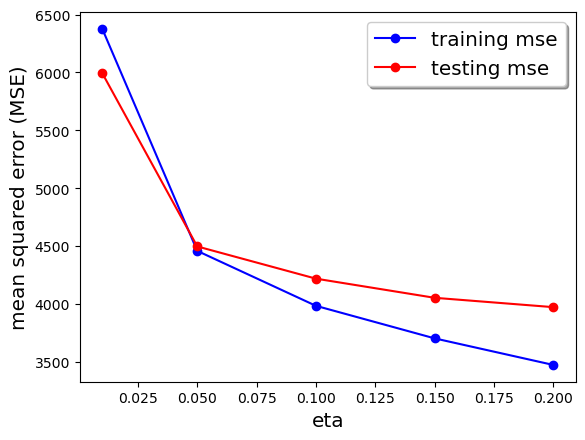

In [189]:
plt.plot(eta, train_mse, 'bo-', label ='training mse')
plt.plot(eta, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('eta', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [190]:
train_r2

[0.36063415414666933,
 0.5530627871685452,
 0.6006765512014884,
 0.6288856746128147,
 0.6519145959373639]

In [191]:
test_r2

[0.3693140685879155,
 0.5268585914762753,
 0.5561697182472003,
 0.57358727144652,
 0.5820897075815773]

Use eta 0.15

In [22]:
tuned_xgb = XGBRegressor(subsample = 0.8, 
                       gamma = 6, 
                       max_depth = 3, 
                       reg_lambda = 5.0, 
                       reg_alpha = 10.0,
                        eta = 0.15, 
                       random_state = 42)

tuned_xgb.fit(X_train_listings, y_train_listings) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.15, eval_metric=None,
             feature_types=None, gamma=6, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [199]:
print('the training mean squared error is: ', mean_squared_error(tuned_xgb.predict(X_train_listings), y_train_listings))
print('the testing mean squared error is: ', mean_squared_error(tuned_xgb.predict(X_test_listings), y_test_listings))

print('the training R2 Squared is: ', r2_score(y_train_listings, tuned_xgb.predict(X_train_listings)))
print('the testing R2 Squared is: ', r2_score(y_test_listings,tuned_xgb.predict(X_test_listings)))

the training mean squared error is:  3700.7443725096705
the testing mean squared error is:  4051.3928435282937
the training R2 Squared is:  0.6288856746128147
the testing R2 Squared is:  0.57358727144652


##### Feature selection

In [263]:
p_value = sm.OLS(y_train_listings, X_train_listings).fit() # for reference
# Summary statistics from the model
p_value.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              1395.
Date:                Sun, 28 Jan 2024   Prob (F-statistic):                        0.00
Time:                        22:24:24   Log-Likelihood:                         -25334.
No. Observations:                4414   AIC:                                  5.070e+04
Df Residuals:                    4398   BIC:                                  5.080e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
host_id                           10.4860      4.290      2.444      0.015       2.075      18.897
neighbourhood                    159.4054     11.688     13.639      0.000     136.492     182.319
room_type                        167.0775      3.955     42.248      0.000     159.324     174.831
minimum_nights                   -54.5815      3.411    -16.001      0.000     -61.269     -47.894
number_of_reviews                -26.5440      3.991     -6.652      0.000     -34.367     -18.720
last_review                       -6.6983      3.776     -1.774      0.076     -14.102       0.705
calculated_host_listings_count   -48.8701      4.877    -10.021      0.000     -58.431     -39.309
availability_365                  40.0459      2.986     13.410      0.000      34.191      45.900
apart                             12.6099      4.545      2.774      0.006       3.699      21.521
apt                               -6.1871      4.998     -1.238      0.216     -15.986       3.612
bedroom                           30.5097      4.345      7.022      0.000      21.991      39.028
br                                70.0531      4.491     15.600      0.000      61.249      78.857
citi                             -21.5329      4.764     -4.520      0.000     -30.872     -12.193
mrt                                4.2870      4.232      1.013      0.311      -4.011      12.585
near                               3.3569      4.698      0.715      0.475      -5.853      12.566
room                              -8.7735      3.451     -2.542      0.011     -15.540      -2.007
==============================================================================
Omnibus:                      867.420   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1677.290
Skew:                           1.192   Prob(JB):                         0.00
Kurtosis:                       4.855   Cond. No.                         14.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
# only choose those that have 0 p-value

dropped_features = ['apt','mrt','near','room']

X_train_new = X_train_listings.drop(dropped_features, axis =1)
X_test_new = X_test_listings.drop(dropped_features, axis = 1)

In [204]:
tuned_xgb.fit(X_train_new, y_train_listings)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.15, eval_metric=None,
             feature_types=None, gamma=6, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [205]:
print('the training mean squared error is: ', mean_squared_error(tuned_xgb.predict(X_train_new), y_train_listings))
print('the testing mean squared error is: ', mean_squared_error(tuned_xgb.predict(X_test_new), y_test_listings))

print('the training R2 Squared is: ', r2_score(y_train_listings, tuned_xgb.predict(X_train_new)))
print('the testing R2 Squared is: ', r2_score( y_test_listings, tuned_xgb.predict(X_test_new)))

the training mean squared error is:  3691.4232595312155
the testing mean squared error is:  4057.2337984844503
the training R2 Squared is:  0.6298204050904325
the testing R2 Squared is:  0.572972505701403


Model seems to have lost generalization performance when we remove features, we will use the model before feature selection

### Support Vector Regressor

##### Kernel

In [91]:
print('the training mean squared error is: ', mean_squared_error(svr.predict(X_train_listings), y_train_listings))
print('the testing mean squared error is: ', mean_squared_error(svr.predict(X_test_listings), y_test_listings))

print('the training R2 Squared is: ', r2_score(y_train_listings, svr.predict(X_train_listings)))
print('the testing R2 Squared is: ', r2_score(y_test_listings, svr.predict(X_test_listings)))

the training mean squared error is:  7097.280291197093
the testing mean squared error is:  6507.153923294798
the training R2 Squared is:  0.28827767545446914
the testing R2 Squared is:  0.31511621639407683


our performance is not too good with SVR, try to overfit first

#### C 

inversely proportional to regularization strength

In [92]:
c = [1.0, 2.0, 3.0, 4.0, 5.0]  # default is 1.0, strength of regularization is inveresely proportional

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

for value in c:
    # Create Random Forest Model
    svr_kernel = SVR(C=value, kernel = "rbf")
    
    svr_kernel.fit(X_train_listings, y_train_listings) 
    train_mse.append(mean_squared_error(svr_kernel.predict(X_train_listings), y_train_listings))
    test_mse.append(mean_squared_error(svr_kernel.predict(X_test_listings), y_test_listings))

    train_r2.append(r2_score(y_train_listings, svr_kernel.predict(X_train_listings)))
    test_r2.append(r2_score(y_test_listings, svr_kernel.predict(X_test_listings)))

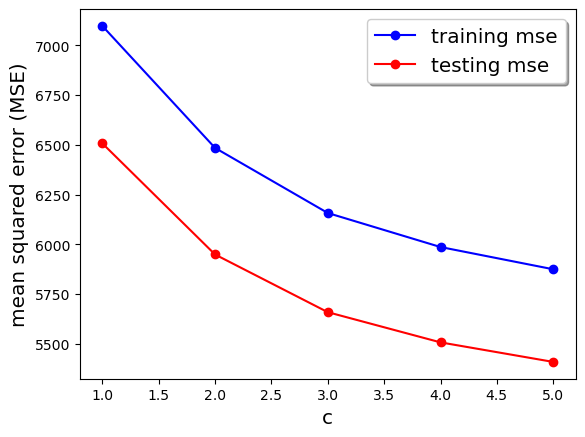

In [93]:
plt.plot(c, train_mse, 'bo-', label ='training mse')
plt.plot(c, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('c', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

A larger C value seems to result in better MSE and R2, showing that the regularization was indeed too strong

In [98]:
c = [5.0, 10.0, 20.0, 50.0, 100.0, 200.0]  # increase from 5

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

for value in c:
    # Create Random Forest Model
    svr_kernel = SVR(C=value, kernel = "rbf")
    
    svr_kernel.fit(X_train_listings, y_train_listings) 
    train_mse.append(mean_squared_error(svr_kernel.predict(X_train_listings), y_train_listings))
    test_mse.append(mean_squared_error(svr_kernel.predict(X_test_listings), y_test_listings))

    train_r2.append(r2_score(y_train_listings, svr_kernel.predict(X_train_listings)))
    test_r2.append(r2_score(y_test_listings, svr_kernel.predict(X_test_listings)))

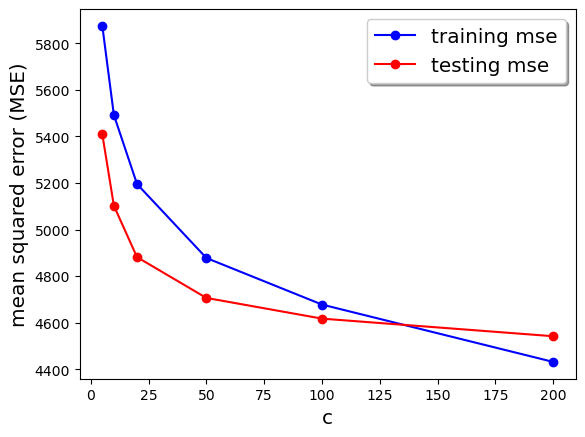

In [99]:
plt.plot(c, train_mse, 'bo-', label ='training mse')
plt.plot(c, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('c', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [100]:
c = [100.0, 200.0, 300.0, 400.0, 500.0]  # increase from 200.0

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

for value in c:
    # Create Random Forest Model
    svr_kernel = SVR(C=value, kernel = "poly")
    
    svr_kernel.fit(X_train_listings, y_train_listings) 
    train_mse.append(mean_squared_error(svr_kernel.predict(X_train_listings), y_train_listings))
    test_mse.append(mean_squared_error(svr_kernel.predict(X_test_listings), y_test_listings))

    train_r2.append(r2_score(y_train_listings, svr_kernel.predict(X_train_listings)))
    test_r2.append(r2_score(y_test_listings, svr_kernel.predict(X_test_listings)))

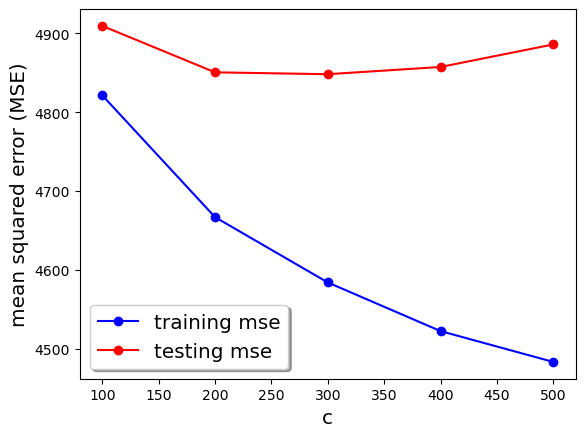

In [101]:
plt.plot(c, train_mse, 'bo-', label ='training mse')
plt.plot(c, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('c', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

We can use C = 200, testing MSE starts to stagnate at 300 with a larger deviation between train and test

test is around 4850, train is around 4650

In [108]:
svr = SVR(C=200, kernel = "poly")
svr.fit(X_train_listings, y_train_listings) 

SVR(C=200, kernel='poly')

In [109]:
print('the training mean squared error is: ', mean_squared_error(svr.predict(X_train_listings), y_train_listings))
print('the testing mean squared error is: ', mean_squared_error(svr.predict(X_test_listings), y_test_listings))

print('the training R2 Squared is: ', r2_score(y_train_listings, svr.predict(X_train_listings)))
print('the testing R2 Squared is: ', r2_score(y_test_listings, svr.predict(X_test_listings)))

the training mean squared error is:  4666.950306143055
the testing mean squared error is:  4850.419732625279
the training R2 Squared is:  0.5319935828733677
the testing R2 Squared is:  0.48948897510093003


#### Kernel

In [102]:
kernels = ["linear", "poly", "sigmoid"]  # default is RBF

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

for value in kernels:
    # Create Random Forest Model
    svr_kernel = SVR(C=200, kernel = value)
    
    svr_kernel.fit(X_train_listings, y_train_listings) 
    train_mse.append(mean_squared_error(svr_kernel.predict(X_train_listings), y_train_listings))
    test_mse.append(mean_squared_error(svr_kernel.predict(X_test_listings), y_test_listings))

    train_r2.append(r2_score(y_train_listings, svr_kernel.predict(X_train_listings)))
    test_r2.append(r2_score(y_test_listings, svr_kernel.predict(X_test_listings)))

In [103]:
train_mse

[6054.10979924748, 4666.950306143055, 26264495.958540954]

In [104]:
test_mse

[5644.897991418291, 4850.419732625279, 27728788.915953316]

In [105]:
train_r2

[0.3928878496290128, 0.5319935828733677, -2632.8297699493182]

In [106]:
test_r2

[0.4058694261723419, 0.48948897510093003, -2917.4798901994145]

continue using RBF

##### Reducing variance

Here, we can tune the epsilon (overfitting) of the RBF Kernel

In [113]:
def svr_bayesian1(tolerance, epsilon):
    
    tolerance = float(tolerance)
    epsilon = float(epsilon)

    svr_bayesian = SVR(C=200, 
                     kernel = "rbf",
                    tol = tolerance,
                    epsilon = epsilon
                    )

    # Calculate cross-validated accuracy
    mse = cross_val_score(svr_bayesian, listing_x_data, listing_y_data, scoring='neg_mean_squared_error', cv=5).mean()

    return mse

In [114]:
pbounds = {
    'epsilon': (0.1, 1), #default is 0.1
    'tolerance': (1e-3, 1e-1) # default=1e-3
}

In [115]:
svr_bo = BayesianOptimization(f=svr_bayesian1, pbounds=pbounds, random_state=42)
svr_bo.maximize(init_points=5, n_iter=10)


|   iter    |  target   |  epsilon  | tolerance |
-------------------------------------------------
| 1         | -4.829e+0 | 0.4371    | 0.09512   |
| 2         | -4.829e+0 | 0.7588    | 0.06027   |
| 3         | -4.83e+03 | 0.2404    | 0.01644   |
| 4         | -4.83e+03 | 0.1523    | 0.08675   |
| 5         | -4.829e+0 | 0.641     | 0.0711    |
| 6         | -4.828e+0 | 1.0       | 0.001     |
| 7         | -4.828e+0 | 1.0       | 0.1       |
| 8         | -4.829e+0 | 0.9537    | 0.06109   |
| 9         | -4.828e+0 | 1.0       | 0.05628   |
| 10        | -4.828e+0 | 1.0       | 0.07654   |
| 11        | -4.829e+0 | 0.496     | 0.001     |
| 12        | -4.829e+0 | 0.4976    | 0.08261   |
| 13        | -4.828e+0 | 1.0       | 0.03095   |
| 14        | -4.829e+0 | 0.9066    | 0.001     |
| 15        | -4.828e+0 | 1.0       | 0.04418   |


In [116]:
best_params = svr_bo.max['params']
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'epsilon': 0.9999799958292386, 'tolerance': 0.044184370355385146}


In [117]:
svr_bayesian = SVR(C=200, 
                     kernel = "rbf",
                    tol = 0.044184370355385146,
                    epsilon = 0.9999799958292386
                    )
svr_bayesian.fit(X_train_listings, y_train_listings)

SVR(C=200, epsilon=0.9999799958292386, tol=0.044184370355385146)

In [118]:
print('the training mean squared error is: ', mean_squared_error(svr_bayesian.predict(X_train_listings), y_train_listings))
print('the testing mean squared error is: ', mean_squared_error(svr_bayesian.predict(X_test_listings), y_test_listings))

print('the training R2 Squared is: ', r2_score(y_train_listings, svr_bayesian.predict(X_train_listings)))
print('the testing R2 Squared is: ', r2_score(y_test_listings, svr_bayesian.predict(X_test_listings)))

the training mean squared error is:  4426.047643519923
the testing mean squared error is:  4540.75028812652
the training R2 Squared is:  0.5561515414147549
the testing R2 Squared is:  0.5220819617300319


##### Feature Engineering

In [39]:
ols = sm.OLS(y_train_listings, X_train_listings).fit()
# Summary statistics from the model
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              1395.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):                        0.00
Time:                        18:38:50   Log-Likelihood:                         -25334.
No. Observations:                4414   AIC:                                  5.070e+04
Df Residuals:                    4398   BIC:                                  5.080e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
host_id                           10.4860      4.290      2.444      0.015       2.075      18.897
neighbourhood                    159.4054     11.688     13.639      0.000     136.492     182.319
room_type                        167.0775      3.955     42.248      0.000     159.324     174.831
minimum_nights                   -54.5815      3.411    -16.001      0.000     -61.269     -47.894
number_of_reviews                -26.5440      3.991     -6.652      0.000     -34.367     -18.720
last_review                       -6.6983      3.776     -1.774      0.076     -14.102       0.705
calculated_host_listings_count   -48.8701      4.877    -10.021      0.000     -58.431     -39.309
availability_365                  40.0459      2.986     13.410      0.000      34.191      45.900
apart                             12.6099      4.545      2.774      0.006       3.699      21.521
apt                               -6.1871      4.998     -1.238      0.216     -15.986       3.612
bedroom                           30.5097      4.345      7.022      0.000      21.991      39.028
br                                70.0531      4.491     15.600      0.000      61.249      78.857
citi                             -21.5329      4.764     -4.520      0.000     -30.872     -12.193
mrt                                4.2870      4.232      1.013      0.311      -4.011      12.585
near                               3.3569      4.698      0.715      0.475      -5.853      12.566
room                              -8.7735      3.451     -2.542      0.011     -15.540      -2.007
==============================================================================
Omnibus:                      867.420   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1677.290
Skew:                           1.192   Prob(JB):                         0.00
Kurtosis:                       4.855   Cond. No.                         14.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From OLS results and Mutual Info score in assignment 1, we can expand on calculated_host_listings_count, room_type and availability_365

In [12]:
dropped_features = ['apt','mrt','near','room']

X_train_new = X_train_listings.drop(dropped_features, axis =1)
X_test_new = X_test_listings.drop(dropped_features, axis = 1)

In [13]:
svr_final = SVR(C=200, 
                     kernel = "rbf",
                    tol = 0.044184370355385146,
                    epsilon = 0.9999799958292386
                    )

svr_final.fit(X_train_new, y_train_listings)

SVR(C=200, epsilon=0.9999799958292386, tol=0.044184370355385146)

In [14]:
print('the training mean squared error is: ', mean_squared_error(svr_final.predict(X_train_new), y_train_listings))
print('the testing mean squared error is: ', mean_squared_error(svr_final.predict(X_test_new), y_test_listings))

print('the training R2 Squared is: ', r2_score(y_train_listings, svr_final.predict(X_train_new)))
print('the testing R2 Squared is: ', r2_score(y_test_listings,svr_final.predict(X_test_new)))

the training mean squared error is:  4541.564732240553
the testing mean squared error is:  4539.325263204926
the training R2 Squared is:  0.5445673728972803
the testing R2 Squared is:  0.5222319468804584


Reduced variance

# Streamlit

In [18]:
X_train_listings

,host_id,neighbourhood,room_type,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,apart,apt,bedroom,br,citi,mrt,near,room
0,0.108964,0.068982,1.000000,0.137931,0.000000,0.72417,0.559406,0.764384,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
1,0.324816,0.854678,1.000000,1.000000,0.000000,0.72417,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
2,0.261713,0.036234,0.564365,0.000000,0.205128,1.00000,0.019802,0.838356,0.000000,0.000000,0.000000,0.000000,0.0,0.702366,0.00000,0.711816
3,0.008282,0.068982,0.564365,0.586207,0.025641,1.00000,0.549505,0.909589,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
4,0.021859,0.197201,0.564365,0.000000,0.000000,0.72417,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409,0.869310,0.191624,1.000000,0.034483,0.230769,1.00000,0.000000,0.128767,0.000000,0.651504,0.000000,0.537883,0.0,0.535000,0.00000,0.000000
4410,0.612223,0.159534,0.000000,0.034483,0.153846,1.00000,0.014851,0.808219,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
4411,0.395014,0.477483,0.564365,0.000000,0.000000,0.72417,0.014851,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,1.000000
4412,0.310671,0.122587,0.564365,0.000000,1.000000,1.00000,0.004950,0.202740,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000


In [15]:
import pickle

# MLP
pickle.dump(mlp_tuned2, open('mlp.pkl', 'wb'))


pickled_mlp = pickle.load(open('mlp.pkl', 'rb'))
pickled_mlp.predict(X_train_listings)



array([158.6876228 , 290.52219387, 110.55130114, ..., 163.99412873,
        68.12813666, 142.98861203])

In [23]:
# XGB

pickle.dump(tuned_xgb, open('xgb.pkl', 'wb'))


pickled_xgb = pickle.load(open('xgb.pkl', 'rb'))
pickled_xgb.predict(X_train_listings)


array([190.95645 , 310.73712 , 145.77855 , ..., 174.76152 ,  83.96027 ,
       114.210175], dtype=float32)

In [21]:
# SVR

pickle.dump(svr_final, open('svr.pkl', 'wb'))


pickled_svr = pickle.load(open('svr.pkl', 'rb'))
pickled_svr.predict(X_train_new)

array([158.6876228 , 290.52219387, 110.55130114, ..., 163.99412873,
        68.12813666, 142.98861203])